In [95]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

For each company calculate how many days Open price was the same as Adj Close
price.

In [96]:
df_ACGL = pd.read_csv('ACGL.csv')
df_ACGL['Company'] = 'ACGL'
df_ACGL.head()
#len(df_ACGL[df_ACGL['Open'] == df_ACGL['Adj Close']])

,Date,High,Low,Open,Close,Volume,Adj Close,Company
0,2017-11-13,32.013332,31.556667,31.626667,31.900000,1667700.0,31.900000,ACGL
1,2017-11-14,32.049999,31.753332,31.906668,31.853333,1342500.0,31.853333,ACGL
2,2017-11-15,32.206669,31.500000,31.756666,32.153332,1646400.0,32.153332,ACGL
3,2017-11-16,32.230000,31.840000,32.203335,31.896667,1642800.0,31.896667,ACGL
4,2017-11-17,32.026669,31.716667,31.760000,31.986668,1018800.0,31.986668,ACGL


In [97]:
df_ESS = pd.read_csv('ESS.csv')
df_ESS['Company'] = 'ESS'
df_ESS.head()
#len(df_ESS[df_ESS['Open'] == df_ESS['Adj Close']])

,Date,High,Low,Open,Close,Volume,Adj Close,Company
0,2017-11-13,258.910004,255.399994,256.589996,258.630005,167900.0,227.394241,ESS
1,2017-11-14,258.899994,256.040009,257.709991,256.820007,323800.0,225.802856,ESS
2,2017-11-15,259.829987,251.919998,256.679993,252.149994,352900.0,221.696838,ESS
3,2017-11-16,254.610001,251.229996,251.910004,253.940002,299100.0,223.270691,ESS
4,2017-11-17,255.130005,250.220001,253.949997,250.850006,233300.0,220.553879,ESS


In [98]:
df_MRO = pd.read_csv('MRO.csv')
df_MRO['Company'] = 'MRO'
df_MRO.head()
len(df_MRO[df_MRO['Open'] == df_MRO['Adj Close']])

3

In [99]:
df_MSFT = pd.read_csv('MSFT.csv')
df_MSFT['Company'] = 'MSFT'
df_MSFT.head()
len(df_MSFT[df_MSFT['Open'] == df_MSFT['Adj Close']])

1

In [100]:
frames = [df_ACGL, df_ESS, df_MRO, df_MSFT]
df = pd.concat(frames)
df.sample(5).style

,Date,High,Low,Open,Close,Volume,Adj Close,Company
261,2018-11-27,16.450001,15.900000,16.200001,16.100000,13631700.000000,15.431390,MRO
533,2019-12-27,159.550003,158.220001,159.449997,158.960007,18412800.000000,156.570709,MSFT
846,2021-03-26,284.579987,278.980011,279.029999,284.329987,334200.000000,276.786652,ESS
860,2021-04-16,40.669998,39.869999,40.639999,40.080002,1403700.000000,40.080002,ACGL
673,2020-07-20,5.620000,5.410000,5.500000,5.490000,20886500.000000,5.363571,MRO


For each company calculate how many days Open price was the same as Adj Close
price.

In [101]:
df_agg = df[df['Open']==df['Close']]
num = df_agg.groupby('Company').count()
num['Volume']


Company
ACGL    10
ESS      1
MRO     14
MSFT     4
Name: Volume, dtype: int64

What is the highest and lowest volume each company recorded?


In [102]:
#Lowest
Min = df.groupby('Company')[['Volume']].min()
#Highet
Max = df.groupby('Company')[['Volume']].max()

In [103]:
#Call Lowest
Min


,Volume
Company,
ACGL,221000.0
ESS,81800.0
MRO,4065000.0
MSFT,7425600.0


In [104]:
#Call Highest
Max

,Volume
Company,
ACGL,93699400.0
ESS,1736600.0
MRO,107519800.0
MSFT,111242100.0


Calculate percent change (returns) of Adj Close price. For each company report on its,
min, max, mean, median of the returns

In [105]:
#Calculating the Returns
df['Return'] = (df['Adj Close'] - df['Open'])/df['Open']
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Company,Return
0,2017-11-13,32.013332,31.556667,31.626667,31.900000,1667700.0,31.900000,ACGL,0.008642
1,2017-11-14,32.049999,31.753332,31.906668,31.853333,1342500.0,31.853333,ACGL,-0.001672
2,2017-11-15,32.206669,31.500000,31.756666,32.153332,1646400.0,32.153332,ACGL,0.012491
3,2017-11-16,32.230000,31.840000,32.203335,31.896667,1642800.0,31.896667,ACGL,-0.009523
4,2017-11-17,32.026669,31.716667,31.760000,31.986668,1018800.0,31.986668,ACGL,0.007137


In [106]:
#Calculating the min, max, mean and median
Min2 = df.groupby('Company')[['Return']].min().rename(columns={'Return':'Min'})
Max2 = df.groupby('Company')[['Return']].max().rename(columns={'Return':'Max'})
Mean2 = df.groupby('Company')[['Return']].mean().rename(columns={'Return':'Mean'})
Median2 = df.groupby('Company')[['Return']].median().rename(columns={'Return':'Median'})
Return_Result = pd.concat([Min2, Max2, Mean2, Median2], axis=1)
Return_Result

,Min,Max,Mean,Median
Company,,,,
ACGL,-0.093884,0.132443,0.000111,0.001124
ESS,-0.163966,0.042529,-0.052396,-0.056602
MRO,-0.157624,0.101210,-0.024836,-0.027920
MSFT,-0.096646,0.081024,-0.015022,-0.014383


When did each company record the highest gain and highest loss for the day?
Hint: idxmax

In [107]:
Min_ACGL = df_ACGL.loc[df['Return'].idxmin(), 'Date']
Min_ESS = df_ESS.loc[df['Return'].idxmin(), 'Date']
Min_MRO = df_MRO.loc[df['Return'].idxmin(), 'Date']
Min_MSFT = df_MSFT.loc[df['Return'].idxmin(), 'Date']
Min_ACGL
Min_ESS
Min_MRO
Min_MSFT

'2020-03-16'

How much money would you get if you invested 1000 in each stock in your dataset?
Assuming that you buy shares on the first day available in the dataset and sell on the
last one? (the price of buying is “Open”, the price for selling “Adj Close”)

In [118]:
filter_ACGL = df[df['Company']=='ACGL']
def ACGLFunction(filter_ACGL):
    ACGL_Stock = 1000
    for i in filter_ACGL['Return']:
        ACGL_Stock += ACGL_Stock * i
    return ACGL_Stock

ACGLFunction(filter_ACGL)

967.2679748524872

(1pt task) Show the time series of the Adj Close prices of the companies (ideally in
the same plot)


Company
ACGL    Axes(0.125,0.11;0.775x0.77)
ESS     Axes(0.125,0.11;0.775x0.77)
MRO     Axes(0.125,0.11;0.775x0.77)
MSFT    Axes(0.125,0.11;0.775x0.77)
Name: Adj Close, dtype: object

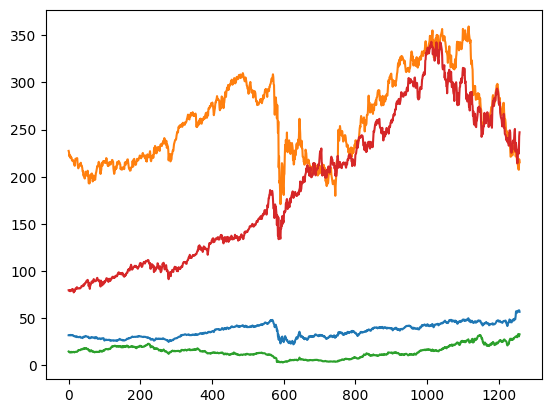

In [ ]:
df.groupby('Company')['Adj Close'].plot()